# Lecture Outliers, Missing Data and Erroneous Data: Examples

In [5]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Example 1: What is an outlier anyway?

What is an outlier anyway? Suppose we have a list of numbers from 1 to 10 and we add a number of fives to this list. If we draw a box plot of the resulting list, the values at the edges of the list will be flagged as outliers if the number of fives get large enough. When does this happen?

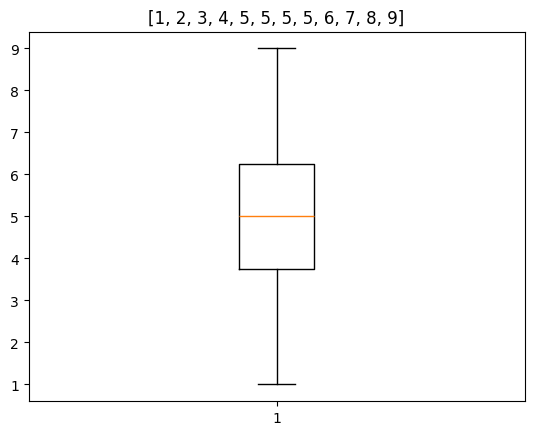

In [6]:
num_fives = 3 # Play around with this value to make outliers appear and disappear.
fives = [5] * num_fives
values = list(range(1, 10)) + fives
values.sort() # This gives us a nicer title, nothing more.
plt.boxplot(values, showfliers=True)
plt.title(values)
plt.show()




## Example 2: Missing Values

In [7]:
dft = pd.read_csv("data/titanic_processed_dedup.csv")
dft


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
1,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
2,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
3,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
4,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
886,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S
887,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
888,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
889,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Check which columns have missing values. Which of these missing values are MCAR: Missing Completely At Random? Which are MAR: Missing At Random? Which are MNAR: Missing Not At Random?

In [8]:
for col in dft.columns:
    if dft[col].isna().sum() < 1:
        continue
    print(f'Column {col: <12} has {dft[col].isna().sum(): 4d} NaN values')

Column Age          has  176 NaN values
Column Cabin        has  687 NaN values
Column Embarked     has    2 NaN values


## Example 3: Imputation

See https://github.com/mcdejonge/workshop-data-preparation/ . This workshop contains an entire section on imputation.

This example is copied from that workshop.

It shows you what happens if you impute missing values in the Age column

First, look at the distribution of the Age variable with no missing values imputed.

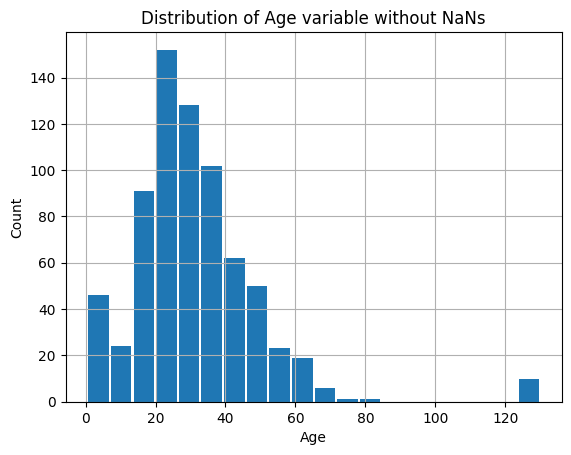

In [9]:
dft[dft['Age'] != np.nan]['Age'].hist(bins=20, rwidth=0.9)
plt.title('Distribution of Age variable without NaNs')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Now fill the missing values with the median.

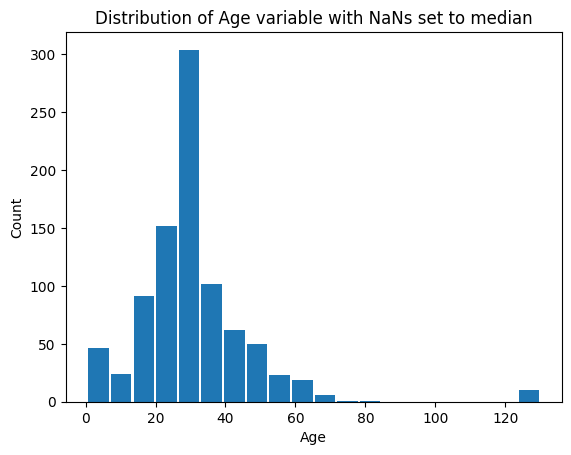

In [10]:
plt.hist(dft['Age'].fillna(dft['Age'].median()), bins=20, rwidth=0.9)
plt.title('Distribution of Age variable with NaNs set to median')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Clearly setting the missing values to the median is a bad idea (in this case). Why?

It is possible to use a random variable of some sort instead of a single value.

Here we use a normally distributed random variable. The mean and standard deviation are taken from the original distribution

Compare the result to the original distribution above.

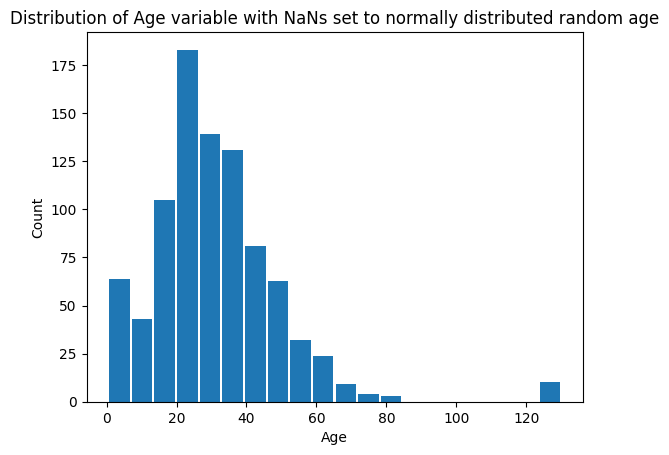

In [11]:
# Luckily for us median and std ignore nan values
age_median = dft['Age'].median()
age_std = dft['Age'].std()
# Notice the following:
#     - Nested list comprehension applying a round() function to each value
#     - if else in list comprehension. We need to make sure ages are not negative.
random_ages = pd.Series([x if x > 0 else x * -1 for x in [round(x) for x in np.random.normal(age_median, age_std, len(dft))]])
plt.hist(dft['Age'].fillna(random_ages), bins=20, rwidth=0.9)

plt.title('Distribution of Age variable with NaNs set to normally distributed random age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()